In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os

# Read all .npz files in the goal_traj folder
goal_traj_folder = 'goal_traj'

for file_name in os.listdir(goal_traj_folder):
    if file_name.endswith('.npz'):
        file_path = os.path.join(goal_traj_folder, file_name)
        # Extract the suffix (e.g., '0' or '1') from the file name
        suffix = file_name.split('_')[-1].split('.')[0]
        data = np.load(file_path)
        for key in data.keys():
            globals()[f"traj_{suffix}_{key}"] = data[key]
# # Visualize x and y labels from the .npz files
# for traj in trajectories:
#     plt.plot(traj['x'], traj['y'], label=traj.files)

# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend()
# plt.show()

[-0.30000001 -0.86079846 -1.6756056  -2.44510865 -3.13186614 -3.09981865]
[-0.30000001 -1.0562979  -1.97026349 -2.15031142 -3.05521015]
[-0.30000001  0.41170737  0.56477641  1.48143559  2.54893713  3.37613526]
[-0.30000001  0.28390948  1.1129311   2.00449748  2.79850957]
[-0.30000001 -1.06180673 -1.76386057 -2.48419435 -3.1294237 ]
[-0.30000001 -1.21530979 -2.02498436 -2.2630115  -3.11808417]
[-0.30000001  0.21716699  0.74837303  1.6542511   2.62076154  3.37426635]
[-0.30000001  0.06903804  0.98320214  1.91631245  2.77091623]


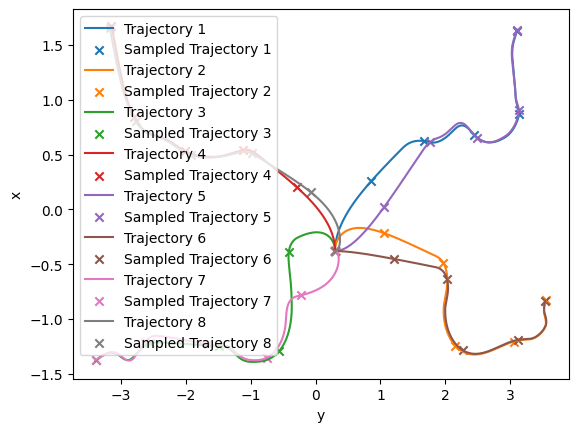

In [7]:
sampling_point = 5
x = np.zeros(shape=(8,sampling_point+1))
y = np.zeros(shape=(8,sampling_point+1))
for i in range(1, 9):
    plt.plot(-globals()[f'traj_{i}_y'], globals()[f'traj_{i}_x'], label=f'Trajectory {i}')
    sampled_y = globals()[f'traj_{i}_y'][::len(globals()[f'traj_{i}_y'])//sampling_point]
    sampled_x = globals()[f'traj_{i}_x'][::len(globals()[f'traj_{i}_x'])//sampling_point]
    print(sampled_y)
    if(len(sampled_y) == 5):
        sampled_y = np.append(sampled_y, globals()[f'traj_{i}_y'][-1])
    if(len(sampled_x) == 5):
        sampled_x = np.append(sampled_x, globals()[f'traj_{i}_x'][-1])
    x[i-1] = sampled_x
    y[i-1] = sampled_y
    plt.scatter(-sampled_y, sampled_x, label=f'Sampled Trajectory {i}', marker='x')
    plt.xlabel('y')
    plt.ylabel('x')
plt.legend()
plt.show()

In [4]:
print(f"{x=}")
print(f"{y=}")

x=array([[-0.38      ,  0.25993186,  0.62290687,  0.67978681,  0.87326043,
         1.63001881],
       [-0.38      , -0.2171764 , -0.49116445, -1.24319151, -1.20631616,
        -0.83194353],
       [-0.38      , -0.3902562 , -1.29681267, -1.24951771, -1.22214887,
        -1.37866458],
       [-0.38      ,  0.19986398,  0.54127996,  0.52879156,  0.84574344,
         1.67440765],
       [-0.38      ,  0.02555   ,  0.61400209,  0.6537844 ,  0.90502691,
         1.64005159],
       [-0.38      , -0.4536153 , -0.63984264, -1.28474163, -1.1918724 ,
        -0.8334317 ],
       [-0.38      , -0.78355357, -1.35413103, -1.23126193, -1.20853314,
        -1.37231113],
       [-0.38      ,  0.15491263,  0.51175959,  0.49465864,  0.80512121,
         1.65704387]])
y=array([[-0.30000001, -0.86079846, -1.6756056 , -2.44510865, -3.13186614,
        -3.09981865],
       [-0.30000001, -1.0562979 , -1.97026349, -2.15031142, -3.05521015,
        -3.54465531],
       [-0.30000001,  0.41170737,  0.56477641

#### Scenario list generator

In [5]:
scenario_list = []

for i in range(8):
    for j in range(sampling_point+1):
        scenario_list.append([globals()[f'traj_{i+1}_x'][0],            # x
                                        globals()[f'traj_{i+1}_y'][0],  # y
                                        0.124,                          # z
                                        0.0 if i<=3 else -np.pi/2.0,    # angle
                                        x[i][j],                        # goal_x
                                        y[i][j],                        # goal_y
                                        0.15,                           # goal_z
                                        i+1,                            # scenario
                                        ])

scenario_list = np.array(scenario_list)
print(scenario_list.shape)

(48, 8)


### Sorting array numpy 

In [8]:
# # Calculate the Euclidean distance for each scenario
# distances = np.zeros(scenario_list.shape[0])
number_of_steps = np.zeros(scenario_list.shape[0])
for i in range(scenario_list.shape[0]):
    start_x = scenario_list[i, 0]
    start_y = scenario_list[i, 1]
    goal_x = scenario_list[i, 4]
    goal_y = scenario_list[i, 5]
    traj_x = globals()[f'traj_{int(scenario_list[i,7])}_x']
    traj_y = globals()[f'traj_{int(scenario_list[i,7])}_y']

    start_i_x = np.argwhere(traj_x == start_x).item()
    start_i_y = np.argwhere(traj_y == start_y).item()
    assert start_i_x == start_i_y

    targ_i_x = np.argwhere(traj_x == goal_x).item()
    targ_i_y = np.argwhere(traj_y == goal_y).item()
    assert targ_i_x == targ_i_y
    number_of_steps[i] = abs(targ_i_x - start_i_x)

# Get the indices that would sort the distances array
sorted_indices = np.argsort(number_of_steps)

# Sort the scenario_list based on the sorted indices
sorted_scenario_list = scenario_list[sorted_indices][8:]

print(sorted_scenario_list)

# Save the sorted scenario list to a .npz file
np.savez('scenario_list.npz', scenario_list=sorted_scenario_list)

[[-0.38       -0.30000001  0.124      -1.57079633 -0.4536153  -1.21530979
   0.15        6.        ]
 [-0.38       -0.30000001  0.124      -1.57079633  0.02555    -1.06180673
   0.15        5.        ]
 [-0.38       -0.30000001  0.124       0.          0.19986398  0.28390948
   0.15        4.        ]
 [-0.38       -0.30000001  0.124       0.          0.25993186 -0.86079846
   0.15        1.        ]
 [-0.38       -0.30000001  0.124      -1.57079633  0.15491263  0.06903804
   0.15        8.        ]
 [-0.38       -0.30000001  0.124       0.         -0.2171764  -1.0562979
   0.15        2.        ]
 [-0.38       -0.30000001  0.124      -1.57079633 -0.78355357  0.21716699
   0.15        7.        ]
 [-0.38       -0.30000001  0.124       0.         -0.3902562   0.41170737
   0.15        3.        ]
 [-0.38       -0.30000001  0.124      -1.57079633 -0.63984264 -2.02498436
   0.15        6.        ]
 [-0.38       -0.30000001  0.124      -1.57079633  0.61400209 -1.76386057
   0.15        5. 